<a href="https://colab.research.google.com/github/Android998/TensorFlow2.3/blob/master/CrearRNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creando nuestra propia RNC**

### **Paso 1: Importar las librerias**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [ ]:
tf.__version__

'2.3.0'

In [2]:
%matplotlib inline

### **Paso 2: Pre procesado de datos**

#### **Cargar Cifar 10**

In [3]:
#Configurar el nombre de las clases del dataset
calss_names = ["avion", "coche", "pájaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camión"]

In [4]:
#Cargar el dataset
[X_train, y_train], [X_test, y_test] = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


#### **Normalizar las imagenes**

In [5]:
X_train = X_train/255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test = X_test/255.0

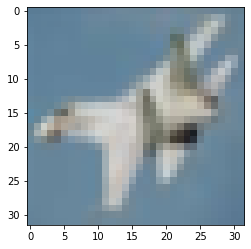

In [7]:
plt.imshow(X_test[10])

In [8]:
y_test[10]

array([0], dtype=uint8)

### **Paso 3: Construir una red neuronal convolucional**

#### **Definir el modelo**

In [9]:
modelo = tf.keras.models.Sequential()

#### **Añadir la primera capa de convolución**
Hyper parametros de la capa de la RNC:
- Filtros: 32
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU
- Input_shape: (32, 32, 3)

In [10]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))

In [11]:
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir una segunda capa convolucional y la capa de max-pooling**
Hyper parametros de la capa de la RNC:
- Filtros: 64
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU

Hyper parametros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [12]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same"))

In [13]:
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir la tercera capa de convolución**
Hyper parametros de la capa de la RNC:
- Filtros: 32
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU
- Input_shape: (32, 32, 3)

In [14]:
modelo.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))

In [15]:
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir una cuarta capa convolucional y la capa de max-pooling**
Hyper parametros de la capa de la RNC:
- Filtros: 64
- Tamaño del kerne: 3
- padding: same
- Función de activación: ReLU

Hyper parametros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [16]:
modelo.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(32, 32, 3)))
modelo.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="same"))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())

#### **Añadir la capa de flattering**

In [17]:
modelo.add(tf.keras.layers.Flatten())

#### **Añadir la primera capa fully connected**
Hyper parametros de la capa totalmente conectada:
- units/neurons:128
- activation: ReLU

In [18]:
modelo.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [19]:
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.BatchNormalization())

In [20]:
modelo.add(tf.keras.layers.Dense(units=256, activation="relu"))

#### **Añadir la capa de salida**

In [21]:
modelo.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [22]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        1

#### **Compilar el modelo**

In [23]:
my_optim = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [24]:
modelo.compile(optimizer=my_optim, loss="sparse_categorical_crossentropy", metrics="sparse_categorical_accuracy")

### **Paso 4: Entrenar el modelo**

In [25]:
modelo.fit(X_train, y_train, batch_size=1000, epochs=100)

Epoch 1/100
50/50 [==============================] - 301s 6s/step - loss: 1.6953 - sparse_categorical_accuracy: 0.3858
Epoch 2/100
50/50 [==============================] - 301s 6s/step - loss: 1.2929 - sparse_categorical_accuracy: 0.5310
Epoch 3/100
50/50 [==============================] - 301s 6s/step - loss: 1.1150 - sparse_categorical_accuracy: 0.5996
Epoch 4/100
50/50 [==============================] - 301s 6s/step - loss: 0.9847 - sparse_categorical_accuracy: 0.6489
Epoch 5/100
50/50 [==============================] - 306s 6s/step - loss: 0.8901 - sparse_categorical_accuracy: 0.6817
Epoch 6/100
50/50 [==============================] - 305s 6s/step - loss: 0.8235 - sparse_categorical_accuracy: 0.7067
Epoch 7/100
50/50 [==============================] - 306s 6s/step - loss: 0.7706 - sparse_categorical_accuracy: 0.7235
Epoch 8/100
50/50 [==============================] - 305s 6s/step - loss: 0.7241 - sparse_categorical_accuracy: 0.7437
Epoch 9/100
50/50 [=============================

KeyboardInterrupt: ignored

#### **Evaluar el modelo**

In [27]:
test_loss, test_accuracy = modelo.evaluate(X_test, y_test)

313/313 [==============================] - 16s 52ms/step - loss: 0.8564 - sparse_categorical_accuracy: 0.7987


In [29]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7986999750137329
